<a href="https://colab.research.google.com/github/SarkarPriyanshu/OasisInfobyteTasks/blob/main/Oasis_Infobyte_Internships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
# Oasis Infobyte Task 1

**UNEMPLOYMENT ANALYSIS WITH PYTHON**

📊📝🧮

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

</div>



<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
## Data Loading

</div>


In [1]:
! pip install -q plotly
! pip install -q dash
! pip install -q jupyter-dash

! pip install -q kaggle

! chmod 600 ~/.kaggle/kaggle.json

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

!kaggle datasets download -d gokulrajkmv/unemployment-in-india


!pip install jupyterthemes --q

!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 26.0MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 75.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
 

In [2]:
def extractFiles(path):
  import zipfile
  zip_ref = zipfile.ZipFile(path, 'r')
  zip_ref.extractall("/content/")
  zip_ref.close()

extractFiles("/content/unemployment-in-india.zip")

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

from dash import Dash,dcc,html
from dash.exceptions import PreventUpdate
from dash.dependencies import Input,Output
from jupyter_dash import JupyterDash

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

In [4]:
df1 =pd.read_csv('/content/Unemployment in India.csv')
df2 =pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

df1.rename(columns=lambda x:x.strip(),inplace=True)
df2.rename(columns=lambda x:x.strip(),inplace=True)


<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
## Data Description

- **Region**: This column tells us the specific area or location where the data was collected. It could be a city, a state, or even a country, depending on the scope of your dataset.

- **Estimated Employed**: This column shows the number of people who are currently employed in the specified region. It's an estimate because it's not always possible to count every single person, so statisticians use methods to make an educated guess.

- **Estimated Labour Participation Rate (%)**: This column represents the percentage of people in the region who are either employed or actively looking for work. So, it's like a measure of how many people are either working or trying to find a job compared to the total population of working-age individuals.

- **Date**: This column indicates the date when the data was collected or recorded. It helps us track changes over time and see how employment and unemployment rates evolve during the COVID-19 pandemic.

- **Estimated Unemployment Rate (%)**: This column shows the percentage of people in the region who are actively looking for a job but currently do not have one. It's a measure of joblessness in the area.

- **Part**: This column might refer to a specific part or division within the region, providing more detailed information about where the data was collected. For example, it could be a district within a city or a county within a state.

- **Month**: This column likely represents the month associated with the data. It helps organize the information chronologically, allowing us to see trends and patterns month by month.


</div>





In [5]:
common_columns = list(set(df1.columns).intersection(set(df2.columns)))

In [6]:
merge_df = pd.concat((df1[common_columns],df2[common_columns]),axis=0)

In [7]:
merge_df.sample(5)

,Date,Frequency,Region,Estimated Labour Participation Rate (%),Estimated Unemployment Rate (%),Estimated Employed
656,31-05-2020,Monthly,Rajasthan,36.71,25.35,4225486.0
14,31-05-2020,M,Assam,48.26,9.55,11367897.0
176,30-06-2019,Monthly,Madhya Pradesh,40.48,4.25,16294794.0
233,31-07-2020,M,Tripura,50.78,18.24,1348849.0
169,31-01-2020,Monthly,Kerala,37.66,4.11,5307026.0


In [8]:
merge_df.shape

(1035, 6)

In [9]:
np.round(merge_df.isna().sum() / merge_df.shape[0] * 100,2)

Date                                       2.71
Frequency                                  2.71
Region                                     2.71
Estimated Labour Participation Rate (%)    2.71
Estimated Unemployment Rate (%)            2.71
Estimated Employed                         2.71
dtype: float64

In [10]:
merge_df.dropna(inplace=True)

In [11]:
merge_df.reset_index(drop=True,inplace=True)

In [12]:
merge_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,1007,18,29-02-2020,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency,1007,3,Monthly,381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,1007,28,Andhra Pradesh,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estimated Labour Participation Rate (%),1007.0,NaN,NaN,NaN,42.37862,8.048542,13.33,37.835,40.88,45.315,72.57
Estimated Unemployment Rate (%),1007.0,NaN,NaN,NaN,11.906991,10.739549,0.0,4.685,8.89,16.125,76.74
Estimated Employed,1007.0,NaN,NaN,NaN,8996209.182721,10207838.810233,49420.0,1639125.0,5543380.0,12871154.0,59433759.0


In [13]:
merge_df = merge_df.astype({'Date':'datetime64[ns]'})

In [14]:
Parts = {value[0]:value[1] for value in df2.groupby(['Region','Region.1'],as_index=False).count().iloc[:,:2].values}

merge_df = merge_df.assign(
    Part = ['North' if value == 'Chandigarh' else Parts[value] for value in merge_df['Region']],
    Month = merge_df['Date'].dt.month_name(),
    Year = merge_df['Date'].dt.year
)

In [15]:
merge_df.sample(5)

,Date,Frequency,Region,Estimated Labour Participation Rate (%),Estimated Unemployment Rate (%),Estimated Employed,Part,Month,Year
356,2020-04-30,Monthly,West Bengal,39.27,18.32,17639370.0,East,April,2020
807,2020-08-31,M,Gujarat,43.55,1.87,22817232.0,West,August,2020
988,2020-02-29,M,Uttarakhand,36.48,4.99,3020931.0,North,February,2020
503,2020-03-31,Monthly,Jammu & Kashmir,36.21,14.29,998103.0,North,March,2020
333,2019-06-30,Monthly,Uttarakhand,37.01,4.65,2021553.0,North,June,2019


In [16]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     1007 non-null   datetime64[ns]
 1   Frequency                                1007 non-null   object        
 2   Region                                   1007 non-null   object        
 3   Estimated Labour Participation Rate (%)  1007 non-null   float64       
 4   Estimated Unemployment Rate (%)          1007 non-null   float64       
 5   Estimated Employed                       1007 non-null   float64       
 6   Part                                     1007 non-null   object        
 7   Month                                    1007 non-null   object        
 8   Year                                     1007 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1)

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
## EDA

</div>

In [17]:
fig = px.histogram(merge_df,
                   x="Estimated Unemployment Rate (%)",
                   color="Part",
                   marginal="box",
                   title='Estimated Unemployment Rate (%) in different parts of India'
                   )
fig.show()

**Observations**

- The South and Northeast regions generally have lower median unemployment rates compared to the East, West, and North regions. This suggests that, on average, the South and Northeast have better employment conditions. But over time there is certain peak point where south states struggle in terms of unemployment we can clearly see that in line chart during MAY 2020 - JULY 2020.

- However, the South has the widest dispersion, indicating greater variability in unemployment rates across its areas. This could imply more significant disparities in employment opportunities or economic conditions within the region.

- On the other hand, the East has the highest median unemployment rate among the regions, indicating that, on average, it may have more significant unemployment challenges compared to the others.

- The West region generally has lower median unemployment rates compared to the other regions, suggesting that, on average, it may have better employment conditions.

#### Are there any noticeable trends or patterns in the Estimated Unemployment Rate (%) across regions over the months?

In [18]:
avgLabourParticipationRate = merge_df.groupby(['Date','Part'],as_index=False).agg({'Estimated Unemployment Rate (%)':'mean'})
fig = px.line(avgLabourParticipationRate,
              x='Date',
              y='Estimated Unemployment Rate (%)',
              color='Part',
              markers=True,
              title='Average Estimated Unemployment Rate (%) over time.')
fig.show()

In [19]:
fig = px.histogram(merge_df,
                   x="Estimated Labour Participation Rate (%)",
                   color="Part",
                   marginal="box",
                   title='Estimated Labour Participation Rate (%) in different parts of India'
                   )
fig.show()

**Obserations**
- The Northeast region generally has higher median participation rates compared to other regions.
- The South region has the widest dispersion, indicating more variability in participation rates across different areas. This could suggest disparities in employment opportunities or economic conditions within the region.
- The East and North regions appear to have more consistent participation rates, with narrower dispersions and median values around 40%.

#### How has the Estimated Employed changed over time across different regions during the COVID-19 pandemic?

In [20]:
avgLabourParticipationRate = merge_df.groupby(['Date','Part'],as_index=False).agg({'Estimated Labour Participation Rate (%)':'mean'})
fig = px.line(avgLabourParticipationRate,
              x='Date',
              y='Estimated Labour Participation Rate (%)',
              color='Part',
              markers=True,
              title='Estimated Labour Participation Rate (%) over time.'
              )
fig.show()

#### What is the relationship between unemployment and labor participation

In [21]:
fig = px.scatter(merge_df, x="Estimated Labour Participation Rate (%)",
                 y="Estimated Unemployment Rate (%)",
                 color="Part",
                 size='Estimated Unemployment Rate (%)')
fig.show()

**Onservations**
- As the What unemployment rate increases and labor participation it results in lower the Labour Participation.
- We saw this in line chart above as the during high peak in May 2020 - july 2020 there was a drop in Labour Participation in different part of country.

**Which region experienced the highest and lowest Estimated Labour Participation Rate (%) on average during the pandemic?**

- South and Northeast states had highly affected by Pandamic because of higher average Estimated Labour Participation Rate and Estimated Unemployment Rate.
- People were more desperately seeking for new oppotunities in South and Northeast states.
- East is second affected part of country that shows Unemployment Rate.
- West and North least affected by Pandamic.

**Which state Estimated Unemployment Rate highly and least affected during the COVID-19 pandemic?**

In [22]:
fig = px.bar(merge_df, x='Region', y='Estimated Unemployment Rate (%)', animation_frame='Month',
             title='Unemployment rate across regions', height=700, template='seaborn')


fig.update_layout(xaxis={'categoryorder': 'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()

In [23]:
fig = px.box(merge_df,
             x='Region',
             y='Estimated Unemployment Rate (%)',
             color='Region',
             notched=True,
             hover_data=["Part"],
             title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

- Puducherry, Jharkhand,Tripura, Bihar, Himachal Pradesh are some of the states which shows extreme values towards 2020.

**Top Regions in terms of Unemployment Rate.**

In [24]:
averageUnemploymentRegions = merge_df\
                              .groupby('Region',as_index=False)\
                              .agg({'Estimated Unemployment Rate (%)':'mean'})\
                              .nlargest(5,'Estimated Unemployment Rate (%)')

fig = px.bar(averageUnemploymentRegions, x="Region", y="Estimated Unemployment Rate (%)",title='Highly affected states during Pandamic.')

fig.show()


In [25]:
topValues = list(averageUnemploymentRegions['Region'].values)
topValues = merge_df.query('Region in @topValues').groupby(['Region','Date']).agg({'Estimated Unemployment Rate (%)':'mean'}).reset_index().dropna()
fig = px.line(topValues,
              x='Date',
              y='Estimated Unemployment Rate (%)',
              color='Region',
              markers=True,
              title='Estimated Unemployment Rate (%) over time for top 5 Regions.'
              )
fig.show()

In [26]:
topValues = list(averageUnemploymentRegions['Region'].values)
topValues = merge_df.query('Region in @topValues').groupby(['Region','Date']).agg({'Estimated Labour Participation Rate (%)':'mean'}).reset_index().dropna()
fig = px.line(topValues,
              x='Date',
              y='Estimated Labour Participation Rate (%)',
              color='Region',
              markers=True,
              title='Estimated Labour Participation Rate (%) over time for top 5 Regions.'
              )
fig.show()

**Bottom Regions in terms of Unemployment Rate.**

In [27]:
averageUnemploymentRegions = merge_df\
                              .groupby('Region',as_index=False)\
                              .agg({'Estimated Unemployment Rate (%)':'mean'})\
                              .nsmallest(5,'Estimated Unemployment Rate (%)')

fig = px.bar(averageUnemploymentRegions, x="Region", y="Estimated Unemployment Rate (%)",title='Least affected states during pandamic')

fig.show()


In [28]:
topValues = list(averageUnemploymentRegions['Region'].values)
topValues = merge_df.query('Region in @topValues').groupby(['Region','Date']).agg({'Estimated Unemployment Rate (%)':'mean'}).reset_index().dropna()
fig = px.line(topValues,
              x='Date',
              y='Estimated Unemployment Rate (%)',
              color='Region',
              markers=True,
              title='Estimated Unemployment Rate (%) over time for bottom 5 Regions.'
              )
fig.show()

In [29]:
topValues = list(averageUnemploymentRegions['Region'].values)
topValues = merge_df.query('Region in @topValues').groupby(['Region','Date']).agg({'Estimated Labour Participation Rate (%)':'mean'}).reset_index().dropna()
fig = px.line(topValues,
              x='Date',
              y='Estimated Labour Participation Rate (%)',
              color='Region',
              markers=True,
              title='Estimated Labour Participation Rate (%) over time for top 5 Regions.'
              )
fig.show()

**Which Part or State affected by Unemployment rate?**

In [30]:
unemployed = merge_df.groupby(['Part', 'Region'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Creating a Sunburst chart
fig = px.sunburst(unemployed, path=['Part', 'Region'], values='Estimated Unemployment Rate (%)', color_continuous_scale='rdylbu',
                  title='Unemployment rate in each Part and State', height=550, template='presentation')

fig.show()

**Observations**
- As we saw in previous observation South and Northeast states are affected by Unemployment
- States from North part of India like Delhi, Haryana, where Bihar and Jharkhand in east and Tipura in Northeast and kerala in south got affected.

In [31]:
regions_list = list(merge_df['Region'].unique())
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']
app = Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H5('How different regions got affected in terms of employement over time?'),
    html.Br(),
    html.Div([
      html.Br(),
      html.Label('Select a region'),
      dcc.Dropdown(
            options = regions_list,
            id='select-region'
        ),
    html.Div(id='statistics',className='container'),
    dcc.Graph(id='line-plot')
    ])
])

@app.callback([Output('line-plot','figure' ),
                Output('statistics', 'children')],
              [Input('select-region','value')])


def updateOutput(selected_region):
  if not selected_region:
    raise PreventUpdate

  filtered_data = merge_df\
                .query(f'Region == "{selected_region}"')\
                .sort_values(by='Date')[['Region','Date','Estimated Unemployment Rate (%)']]

  unemplyment_average = filtered_data['Estimated Unemployment Rate (%)'].mean()
  unemplyment_median = filtered_data['Estimated Unemployment Rate (%)'].median()
  unemplyment_std = filtered_data['Estimated Unemployment Rate (%)'].std()

  statistics_text = html.Div([

        html.Br(),
        html.Div(className='col-12 d-flex justify-content-around align-items-center' ,children=[
                              html.P(className="text-primary text-uppercase",children=f"Mean: {unemplyment_average:.2f}\t\t"),
                              html.P(className="text-primary text-uppercase",children=f"Median: {unemplyment_median:.2f}\t\t"),
                              html.P(className="text-primary text-uppercase",children=f"Standard Deviation: {unemplyment_std:.2f}\t\t")
                              ]),
        html.Div(className='row d-flex justify-content-between', children=[
                    html.Div(className='col-6 justify-content-center d-flex align-items-center',children=[
                              dcc.Graph(id='hist-plot',
                                        figure=px.histogram(filtered_data,
                                                            x="Estimated Unemployment Rate (%)",
                                                             title=f'Estimated Unemployment distribution in {selected_region}.'
                                                             )
                                        )
                              ]),
                    html.Div(className='col-6 justify-content-center d-flex align-items-center',children=[
                              dcc.Graph(id='hist-plot',
                                        figure=px.box(filtered_data,
                                                            x="Estimated Unemployment Rate (%)",
                                                             title=f'Estimated Unemployment boxplot in {selected_region}.'
                                                             )
                                    )
                          ])
                  ])

      ])

  fig =  px.line(filtered_data, x="Date", y="Estimated Unemployment Rate (%)", title=f'Estimated Unemployment in {selected_region} over time.')
  return fig,statistics_text

if __name__ == "__main__":
  app.run_server(debug=True,mode='inline')

<IPython.core.display.Javascript object>

**Impact of Lockdown on States Estimated Employed**

In [32]:
df2 = df2.astype({'Date':'datetime64[ns]'})

df2['Month'] = df2['Date'].dt.month_name()

In [33]:
fig = px.scatter_geo(df2,'longitude', 'latitude', color="Region",
                     hover_name="Region", size="Estimated Unemployment Rate (%)",
                     animation_frame="Month",scope='asia',template='seaborn',title='Impack of lockdown on Employement across regions',
                     width=1000, height=500)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#3399FF",
    showocean=True)

fig.show()

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
# Oasis Infobyte Task 2

**Car price prediction(used cars)**

📊📝🧮

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model.

</div>


In [34]:
!kaggle datasets download -d vijayaadithyanvg/car-price-predictionused-cars

  0% 0.00/3.76k [00:00<?, ?B/s]
100% 3.76k/3.76k [00:00<00:00, 9.23MB/s]


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
plt.style.use('ggplot')

import scipy.stats as stats
from scipy.stats import shapiro,pearsonr,spearmanr,boxcox,f_oneway
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from feature_engine.transformation import LogCpTransformer
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

from jupyterthemes import jtplot
jtplot.style(theme = 'grade3', context = 'notebook', ticks = True, grid = True)

In [36]:
extractFiles('/content/car-price-predictionused-cars.zip')

In [37]:
df = pd.read_csv('/content/car data.csv')

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
## BASIC ANALSYIS

</div>

In [38]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
253,city,2014,7.20,9.90,48000,Diesel,Dealer,Manual,0
95,corolla altis,2012,5.85,18.61,72000,Petrol,Dealer,Manual,0
28,alto k10,2010,1.95,3.95,44542,Petrol,Dealer,Manual,0
187,Honda CB twister,2013,0.25,0.51,32000,Petrol,Individual,Manual,0
33,ertiga,2014,6.00,9.95,45000,Diesel,Dealer,Manual,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [40]:
df.duplicated().sum()

2

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.566332,0.32,1.20,6.10,9.84,92.6
Driven_kms,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


In [43]:
df.describe(include='object').T

,count,unique,top,freq
Car_Name,299,98,city,26
Fuel_Type,299,3,Petrol,239
Selling_type,299,2,Dealer,193
Transmission,299,2,Manual,260


<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
## EDA

</div>

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
### NORMALITY TEST

</div>

In [44]:
numericalFeatures = df.select_dtypes(include=['int','float']).columns

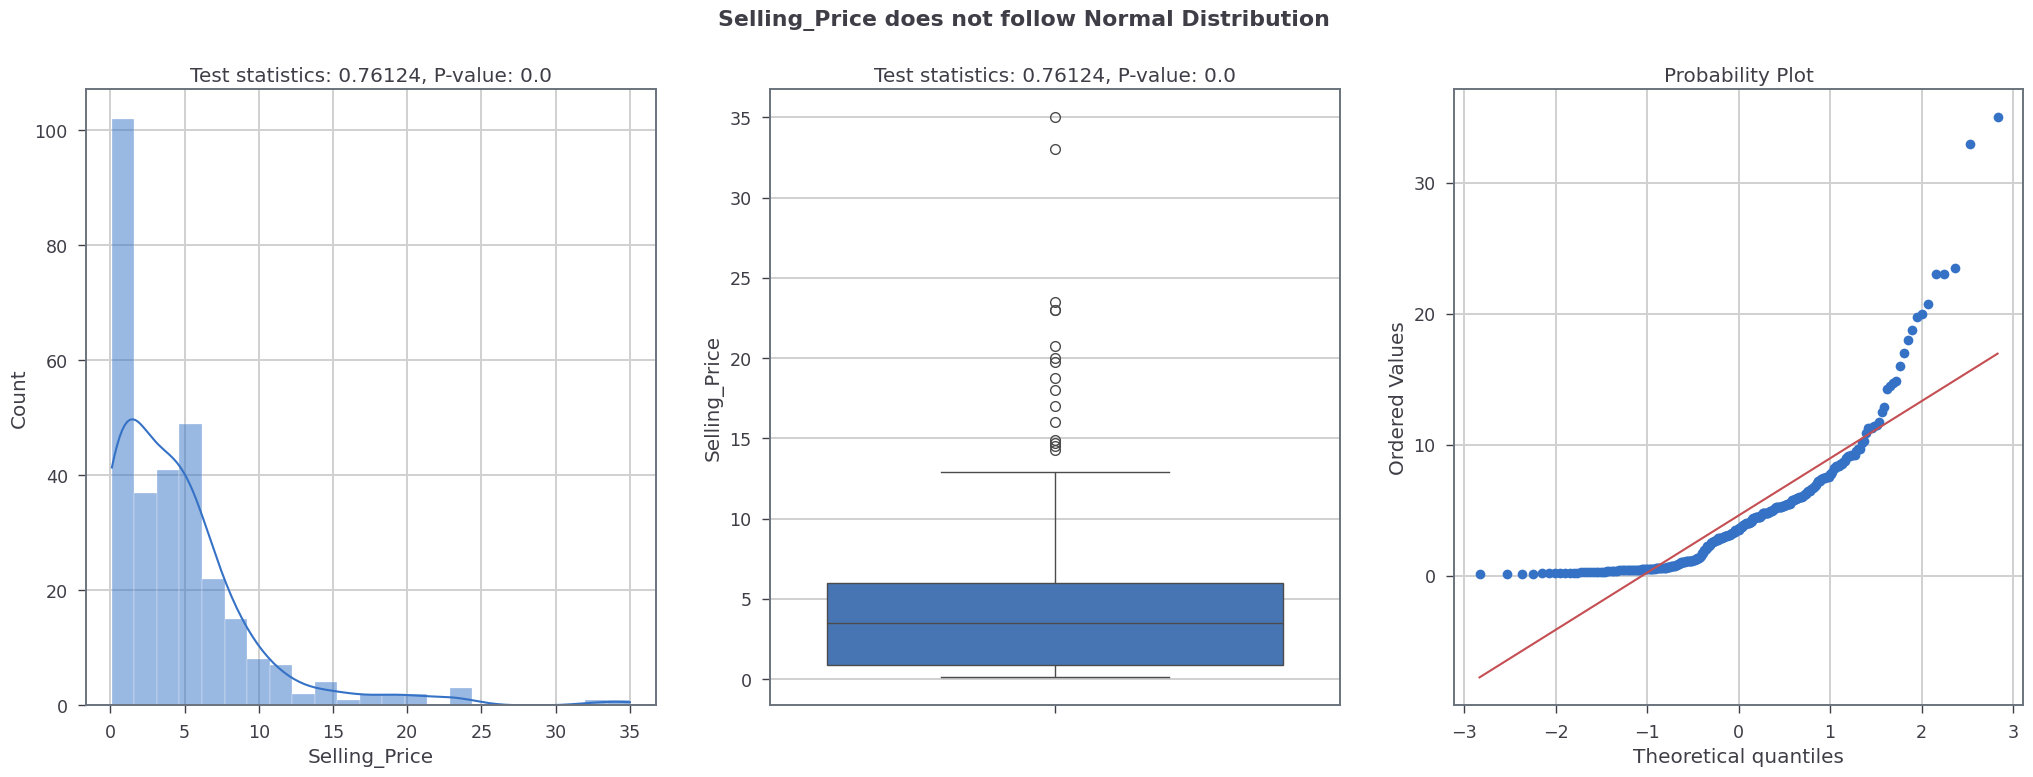

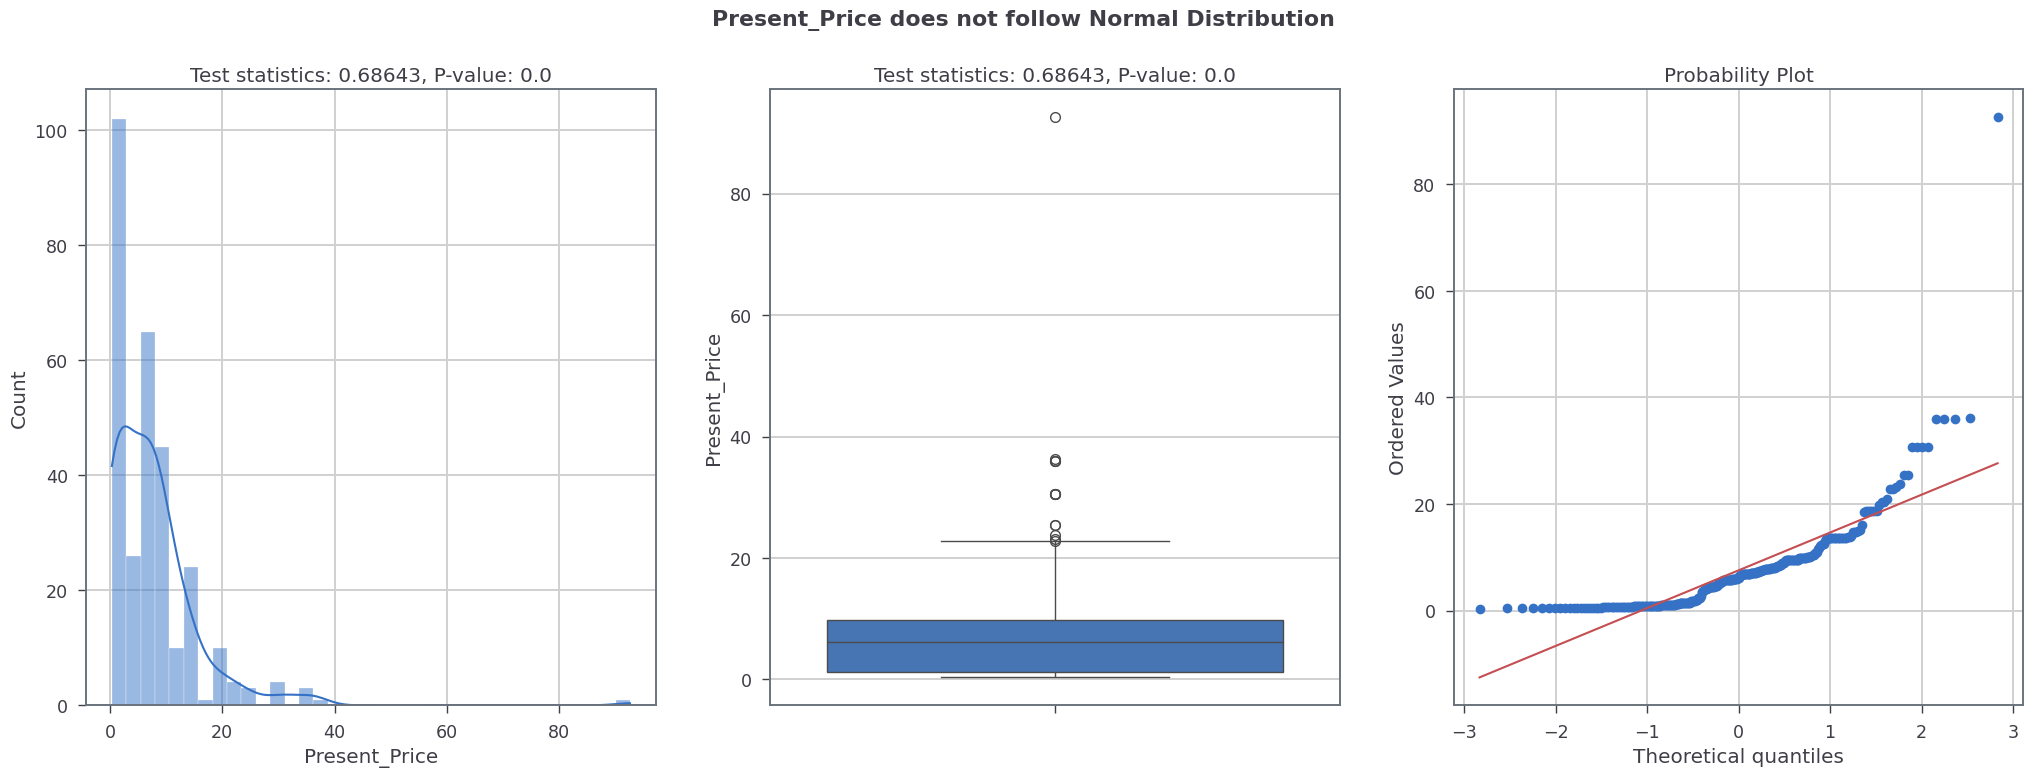

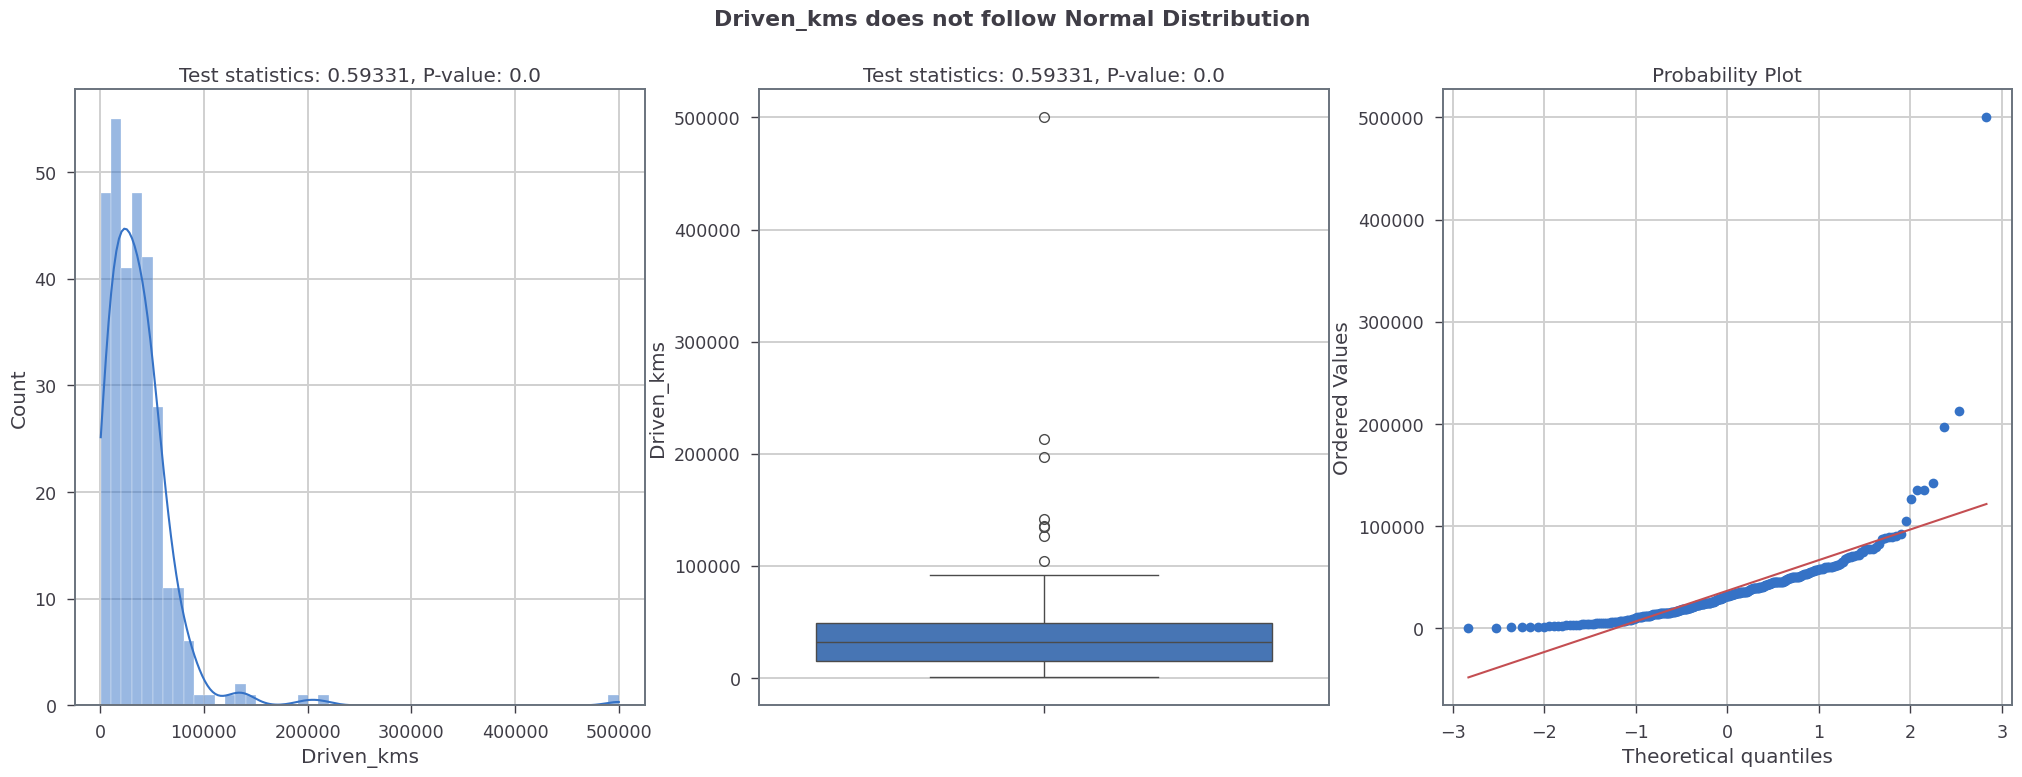

In [45]:
def plotNormalityTest(feature=None,new_data=None):
  fig,ax = plt.subplots(1,3,figsize=(25,8))
  statistics, p_value = shapiro(new_data[feature])
  ax[0].set_title(f'Test statistics: {np.round(statistics,5)}, P-value: {np.round(p_value,5)}')
  ax[1].set_title(f'Test statistics: {np.round(statistics,5)}, P-value: {np.round(p_value,5)}')
  if p_value <= 0.05:
      fig.suptitle(f'{feature} does not follow Normal Distribution',fontweight='bold')
  else:
      fig.suptitle(f'{feature} follows Normal Distribution',fontweight='bold')

  sns.histplot(new_data[feature], ax=ax[0], kde=True)
  sns.boxplot(new_data[feature], ax=ax[1])
  stats.probplot(new_data[feature], plot=ax[2])
  plt.show()
  print('\n\n')

for feature in numericalFeatures:
  if feature not in ['Year','Owner']:
    plotNormalityTest(feature,df)


<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
### CORRELATION CHECK WITH TARGET

</div>

In [46]:
def pearsonrTestPlot(feature,target,new_data):
  fig, ax = plt.subplots(1, 2, figsize=(20, 5))
  pearsonr_statistics,pearsonr_p_value = pearsonr(new_data[feature], new_data[target])
  spearmanr_statistics,spearmanr_p_value = spearmanr(new_data[feature], new_data[target])
  if pearsonr_p_value < 0.05 and spearmanr_p_value < 0.05:
    fig.suptitle(f"""{feature} and {target} are probabily dependent
    pearsonr p-value : {np.round(pearsonr_p_value,5)} & pearsonr corr : {np.round(pearsonr_statistics,5)}
    spearmanr p-value : {np.round(spearmanr_p_value,5)} & spearmanr corr : {np.round(spearmanr_statistics,5)}
                 """,fontsize=10)
  else:
    fig.suptitle(f"""{feature} and {target} are probabily dependent
    pearsonr p-value : {np.round(pearsonr_p_value,5)} & pearsonr corr : {np.round(pearsonr_statistics,5)}
    spearmanr p-value : {np.round(spearmanr_p_value,5)} & spearmanr corr : {np.round(spearmanr_statistics,5)}
                 """,fontsize=10)

  # Plot a scatter plot in the first subplot (ax[0])
  ax[0].scatter(new_data[feature], new_data[target])
  ax[0].set_xlabel(f'{feature}')
  ax[0].set_ylabel(f'{target}')

  # Using Seaborn to create a regression plot in the second subplot (ax[1])
  sns.regplot(data=new_data, x=new_data[feature], y=new_data[target], ax=ax[1])
  ax[1].set_xlabel(f'{feature}')
  ax[1].set_ylabel(f'{target}')

  plt.show()
  print('\n\n')

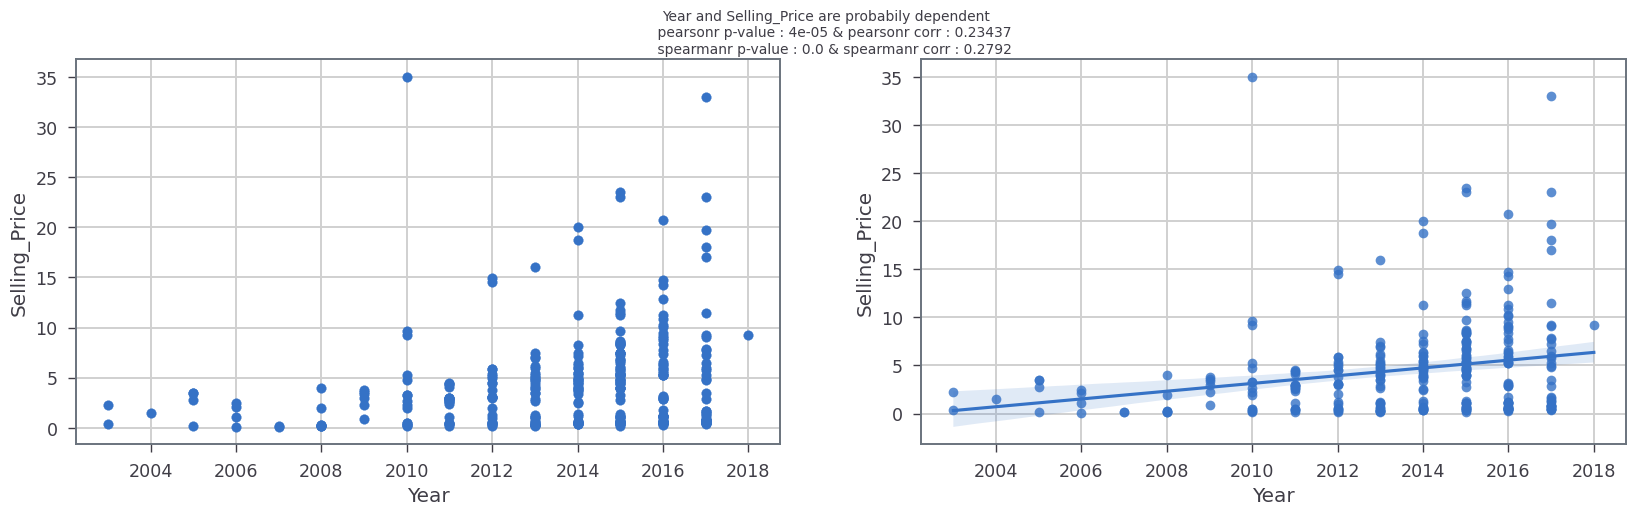

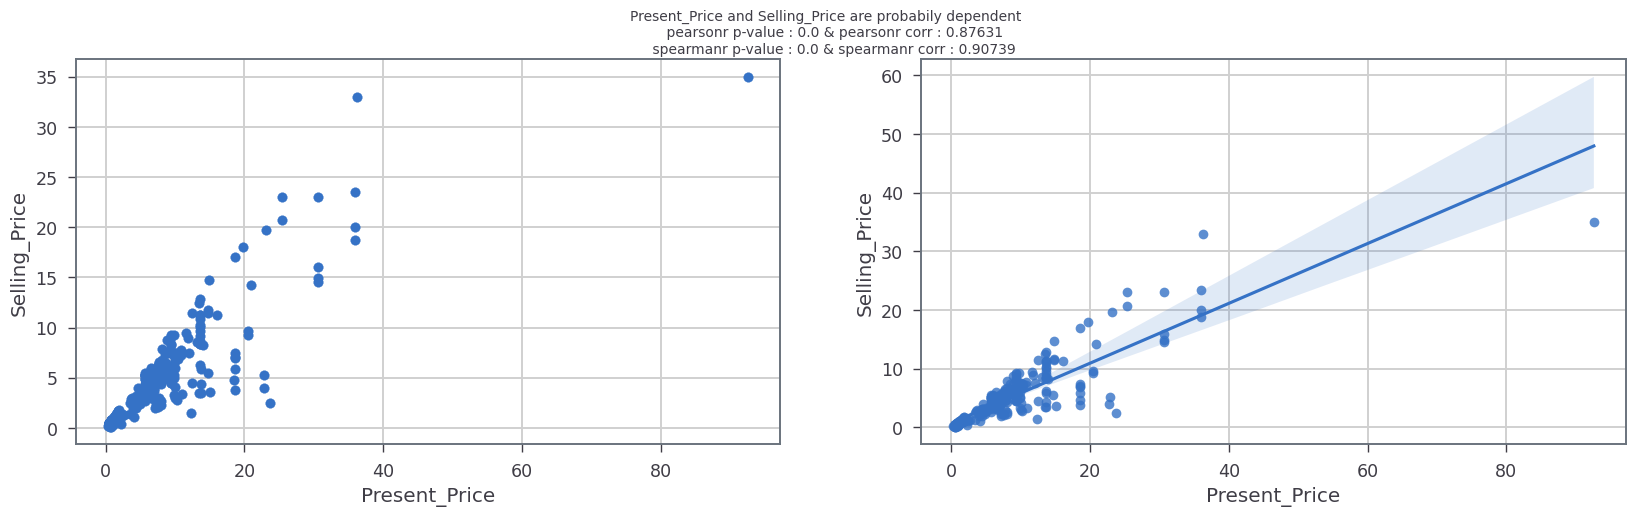

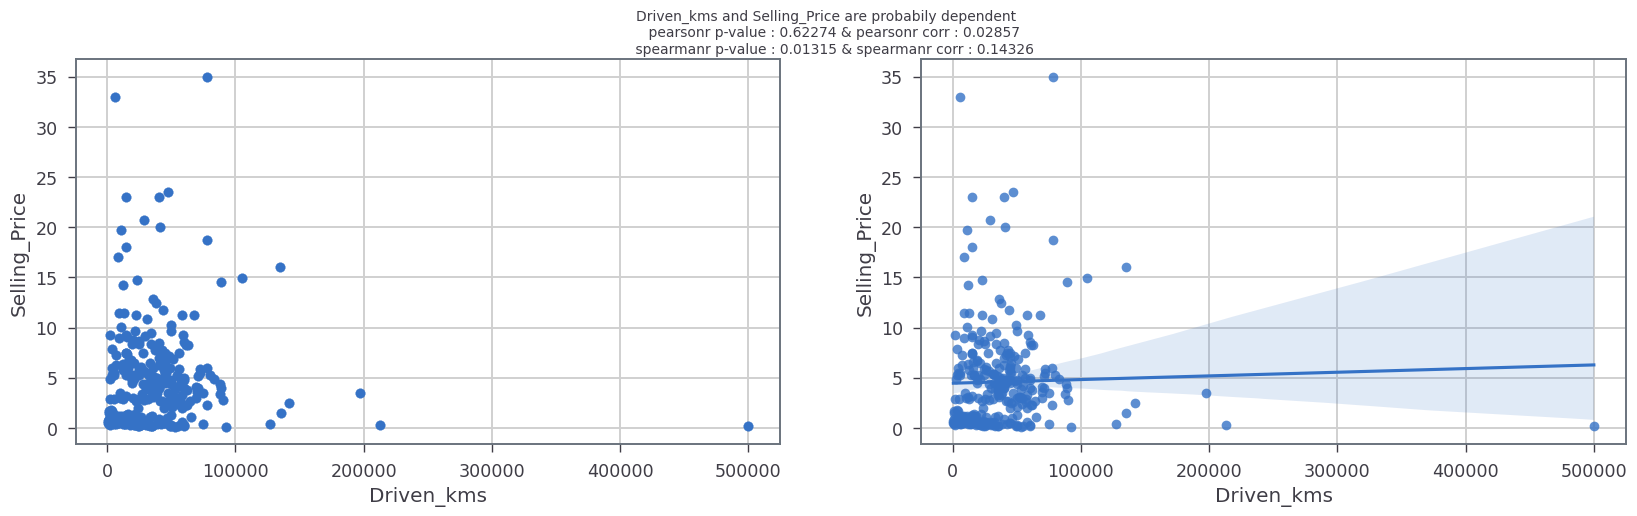

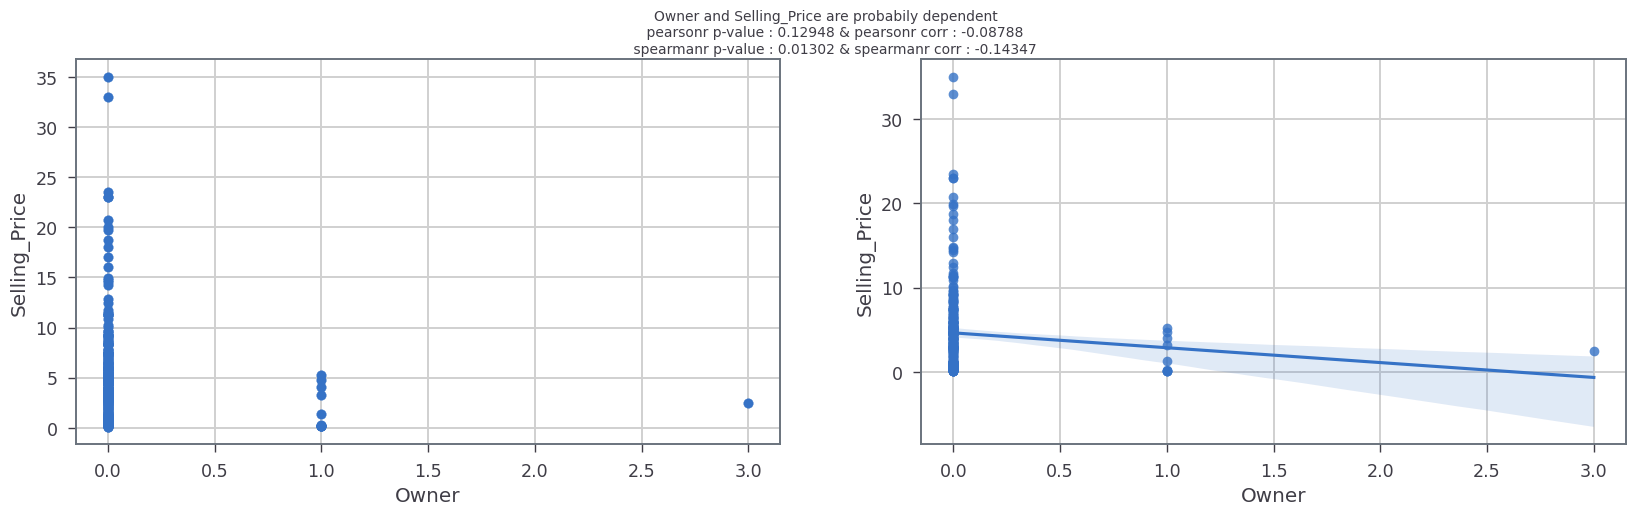

In [47]:
for feature in numericalFeatures:
  if feature not in ['Selling_Price']:
    pearsonrTestPlot(feature,'Selling_Price',df)

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
### CHECKING MULTI-COLINEARITY

</div>

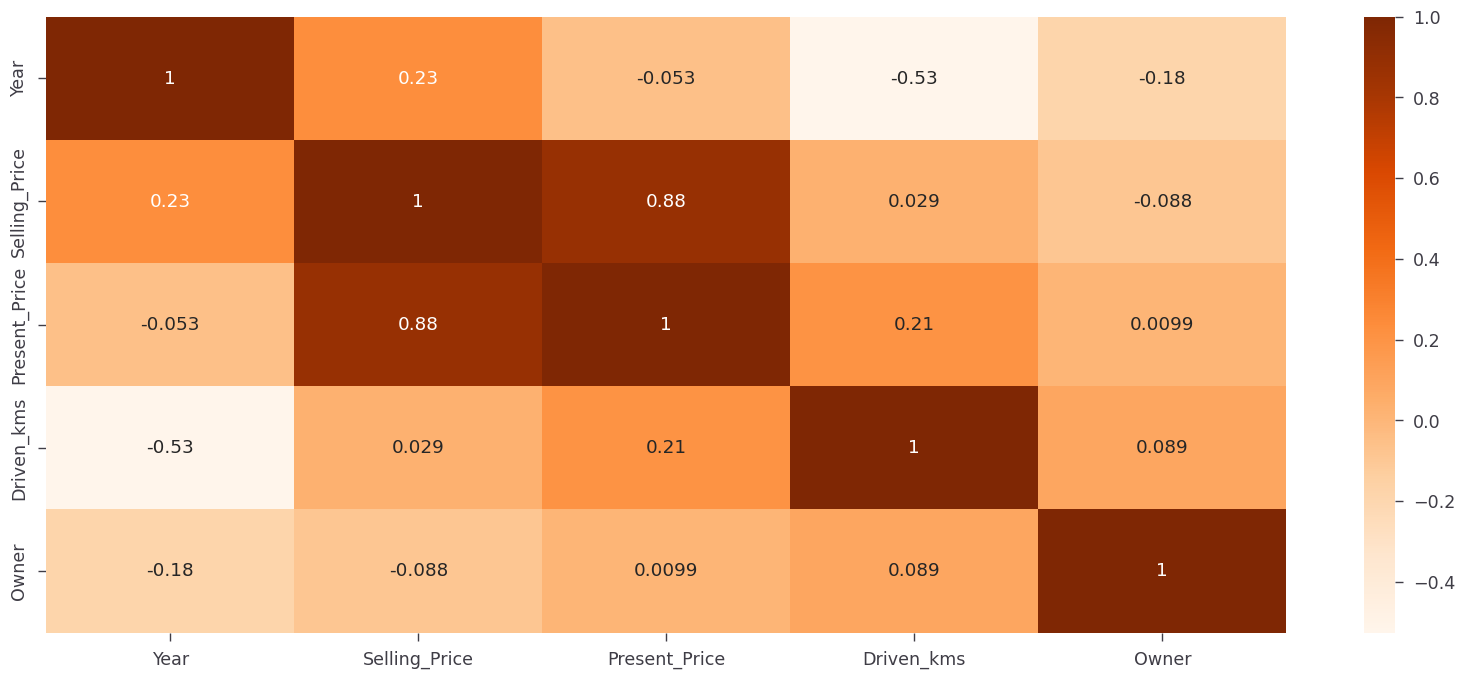

In [48]:
plt.figure(figsize=(20,8))
sns.heatmap(df[numericalFeatures].corr(method='pearson'),annot=True,cmap='Oranges')
plt.show()

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
### ANOVA TEST (CAT vs NUM)

</div>

In [49]:
def anova(feature,target,data):
  # Assuming 'categorical_feature' is your categorical feature and 'life_expectancy' is your target column
  groups = [data[data[feature] == group][target] for group in data[feature].unique()]
  f_statistic, p_value = f_oneway(*groups)
  if p_value < 0.05:
      print(f"H1 : The categorical feature is significant in predicting life expectancy (p-value < 0.05),P-value : {p_value}")
  else:
      print(f"H0 : The categorical feature is no significant in predicting life expectancy (p-value >= 0.05),P-value : {p_value}")


In [50]:
categoricalFeatures = df.select_dtypes(include=['object']).columns

In [53]:
for feature in categoricalFeatures:
  anova(feature,'Selling_Price',df)

H1 : The categorical feature is significant in predicting life expectancy (p-value < 0.05),P-value : 8.187465530791743e-35
H1 : The categorical feature is significant in predicting life expectancy (p-value < 0.05),P-value : 3.1012300197759416e-23
H1 : The categorical feature is significant in predicting life expectancy (p-value < 0.05),P-value : 1.9528990275161135e-25
H1 : The categorical feature is significant in predicting life expectancy (p-value < 0.05),P-value : 5.532298979959147e-10


<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
## FEATRURE ENGINEERING

</div>

***Positive Skewness (Right-Skewed Data)***

- **Log Transformation:** Apply log transformation when the skewness is significant (e.g., > 1) and the data is not too sparse. This can help reduce the skewness and make the data more normally distributed.
- **Square Root Transformation:** Apply square root transformation when the skewness is moderate (e.g., 0.5-1) and the data is not too sparse. This can help reduce the skewness and make the data more normally distributed.
- **Box-Cox Transformation:** Apply Box-Cox transformation when the skewness is significant (e.g., > 1) and the data is not too sparse. This can help reduce the skewness and make the data more normally distributed.

***Negative Skewness (Left-Skewed Data)***

- **Squaring Transformation:** Apply squaring transformation when the skewness is significant (e.g., > 1) and the data is not too sparse. This can help reduce the skewness and make the data more normally distributed.
- **Cubing Transformation:** Apply cubing transformation when the skewness is significant (e.g., > 1) and the data is not too sparse. This can help reduce the skewness and make the data more normally distributed.
- **Yeo-Johnson Transformation:** Apply Yeo-Johnson transformation when the skewness is significant (e.g., > 1) and the data is not too sparse. This can help reduce the skewness and make the data more normally distributed.


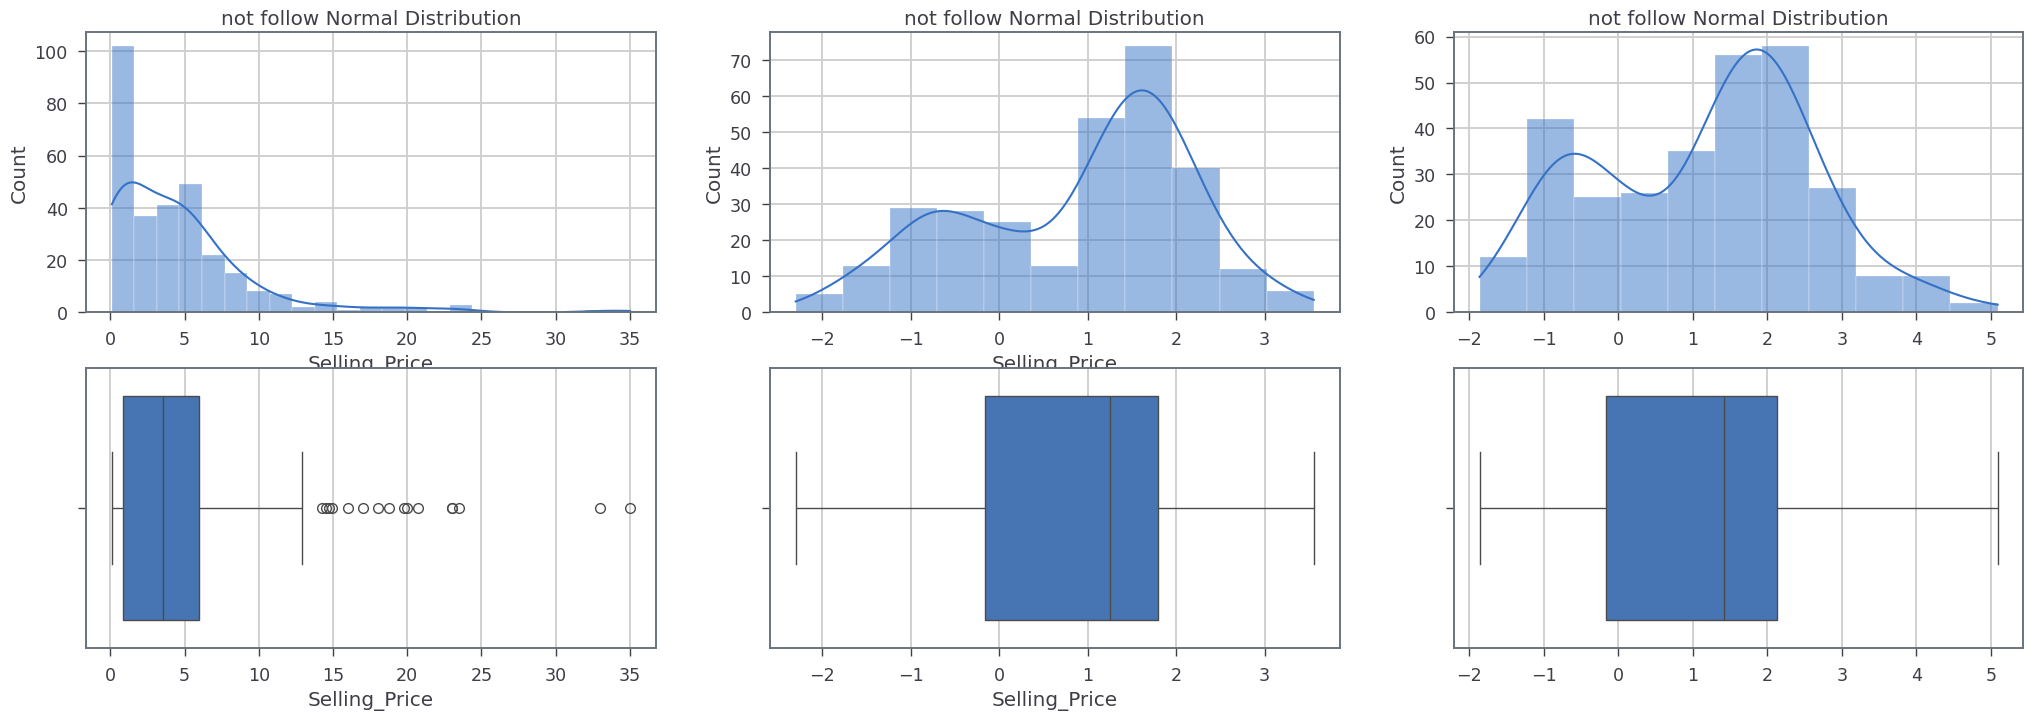

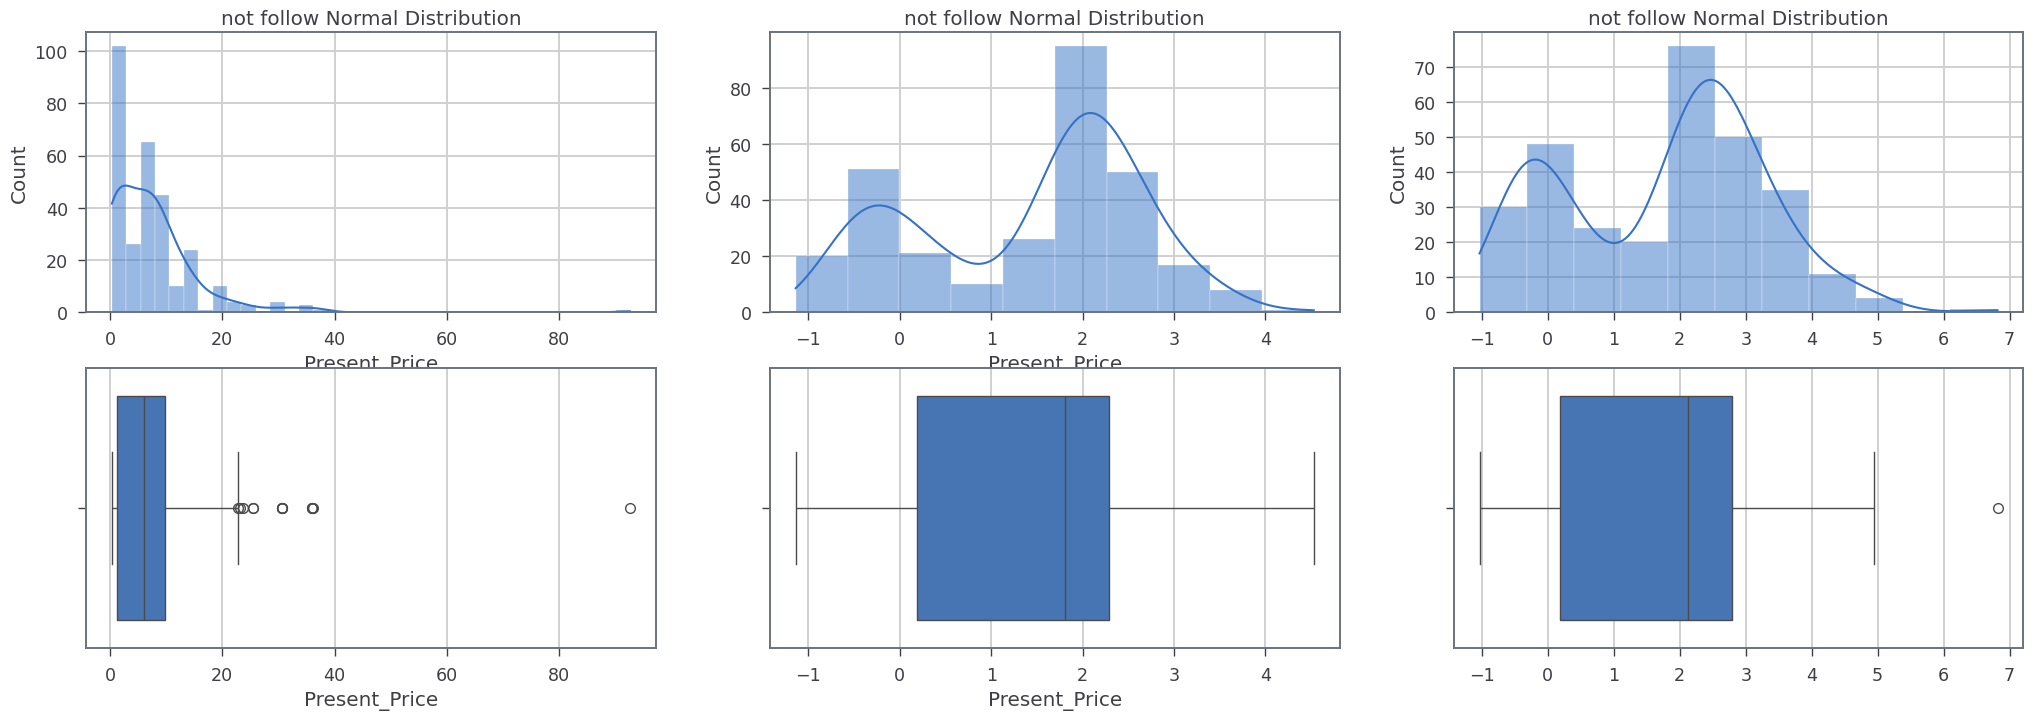

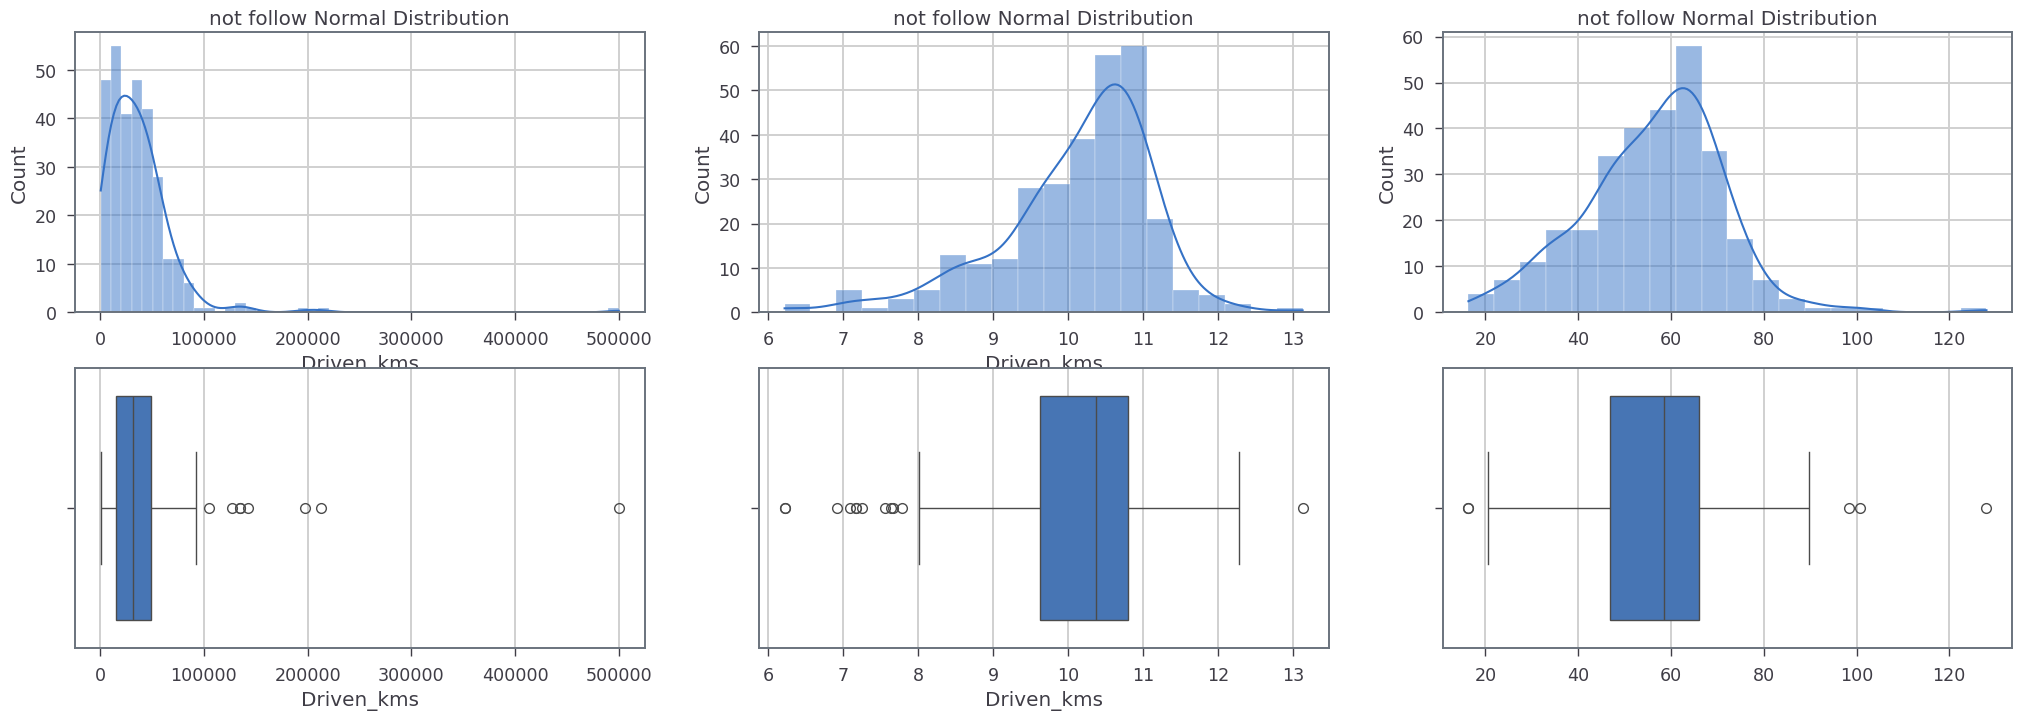

In [54]:
def plotNormalityTest(feature=None,data=None):

  fig,ax = plt.subplots(2,3,figsize=(25,8))
  statistics_0, p_value_0 = shapiro(data[feature])
  statistics_1, p_value_1 = shapiro(np.log(data[feature]))
  dt,lmbda = boxcox(data[feature])
  statistics_2, p_value_2 = shapiro(dt)
  ax[0][0].set_title(f'{"not follow Normal Distribution" if p_value_0 <= 0.05 else "Follows Normal Distribution"}')
  ax[0][1].set_title(f'{"not follow Normal Distribution" if p_value_1 <= 0.05 else "Follows Normal Distribution"}')
  ax[0][2].set_title(f'{"not follow Normal Distribution" if p_value_2 <= 0.05 else "Follows Normal Distribution"}')

  sns.histplot(data[feature], ax=ax[0][0], kde=True)
  sns.histplot(np.log(data[feature]), ax=ax[0][1], kde=True)
  sns.histplot(dt, ax=ax[0][2], kde=True)
  sns.boxplot(data[feature],orient='h',ax=ax[1][0])
  sns.boxplot(np.log(data[feature]),orient='h', ax=ax[1][1])
  sns.boxplot(dt,orient='h',ax=ax[1][2])
  plt.show()
  print('\n\n')

for feature in numericalFeatures:
  if feature not in ['Year','Owner']:
    plotNormalityTest(feature,df)


<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
### IMPACT OF OUTLIERS

</div>

In [55]:
def calculateOutliers(data=None):
  dt = np.array(data)
  Q1 = np.percentile(dt, 25)
  Q3 = np.percentile(dt, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  filtered_dt = dt[(dt<=lower_bound) | (dt>upper_bound)]
  return np.round(len(filtered_dt)/len(dt)*100,2)

In [56]:
pd.DataFrame({
    'Feature_names': [feature for feature in numericalFeatures if feature not in ['Year','Owner']],
    'Before_Transform_Outliers%': [calculateOutliers(df[feature]) for feature in numericalFeatures if feature not in ['Year','Owner']],
    'After_Transform_Outliers%':[calculateOutliers(boxcox(df[feature])[0]) for feature in numericalFeatures if feature not in ['Year','Owner']]
    })

,Feature_names,Before_Transform_Outliers%,After_Transform_Outliers%
0,Selling_Price,5.35,0.00
1,Present_Price,4.68,0.33
2,Driven_kms,2.68,1.67


<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
## MODEL TRANING & FINE TUNING

</div>

In [58]:
X = df[['Year', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df[['Selling_Price']]

In [59]:
X_train, X_other, y_train, y_other = train_test_split(X,y,test_size=0.3,random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size=0.3,random_state=101)

In [60]:
print(f'Training data : {X_train.shape}\nValidation data : {X_val.shape}\nTest data : {X_test.shape}')

Training data : (209, 7)
Validation data : (63, 7)
Test data : (27, 7)


In [80]:
param_grid = {
    "PolynomialFeatures__degree":[2,3,4],
    "Lasso__alpha": np.linspace(0.1,5.0,100)
}

pipe = Pipeline([
    ('LogCpTransformer',LogCpTransformer(variables=['Present_Price','Driven_kms'])),
    ('OneHotEncoder',OneHotEncoder(variables=['Fuel_Type','Selling_type','Transmission'],drop_last=True)),
    ('RobustScaler',RobustScaler()),
    ('PolynomialFeatures',PolynomialFeatures(include_bias=False)),
    ('Lasso',Lasso())
])

search = GridSearchCV(pipe, param_grid, n_jobs=2)

In [81]:
search = search.fit(X_train,y_train)

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
### MODEL EVALUATION

</div>

In [82]:
search.best_score_

0.9380877457560688

In [83]:
param = search.best_params_
param

{'Lasso__alpha': 0.1, 'PolynomialFeatures__degree': 3}

In [85]:
pipe = Pipeline([
    ('LogCpTransformer',LogCpTransformer(variables=['Present_Price','Driven_kms'])),
    ('OneHotEncoder',OneHotEncoder(variables=['Fuel_Type','Selling_type','Transmission'],drop_last=True)),
    ('RobustScaler',RobustScaler()),
    ('PolynomialFeatures',PolynomialFeatures(degree=param['PolynomialFeatures__degree'],include_bias=False)),
    ('Lasso',Lasso(alpha= param['Lasso__alpha']))
])

In [86]:
pipe = pipe.fit(X_train,y_train)

In [87]:
X_train_pred = pipe.predict(X_train)
X_val_pred = pipe.predict(X_val)

In [88]:
r2_score(y_train,X_train_pred)

0.9556013890215949

In [89]:
r2_score(y_val,X_val_pred)

0.9475831728229324

In [90]:
X_test_pred = pipe.predict(X_test)

In [71]:
r2_score(y_test,X_test_pred)

0.9157749520172207

In [72]:
def showResult(residuels=None,data=None,title=None):
    # Create a new figure
    fig = plt.figure(figsize=(20, 8))
    fig.suptitle(f'{title} Evaluation of Residual', fontsize=20)

    # Create a grid for subplots
    gs = grid.GridSpec(ncols=4, nrows=12)

    # Add subplot for Residual Distribution
    ax1 = fig.add_subplot(gs[:5, :])
    ax1.set_title('Residual Distribution', fontsize=12)
    sns.distplot(residuels, ax=ax1)

    # Add subplot for Residual plot
    ax2 = fig.add_subplot(gs[6:, :])
    ax2.set_title('Residual plot', fontsize=12)
    ax2.scatter(data, residuels)
    ax2.axhline(y=0, color='r', ls='--')
    ax2.set_xlabel('Actual Values')
    ax2.set_ylabel('Residual')


    # Display the plot
    plt.show()

<ipython-input-72-de4c0c213f9c>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




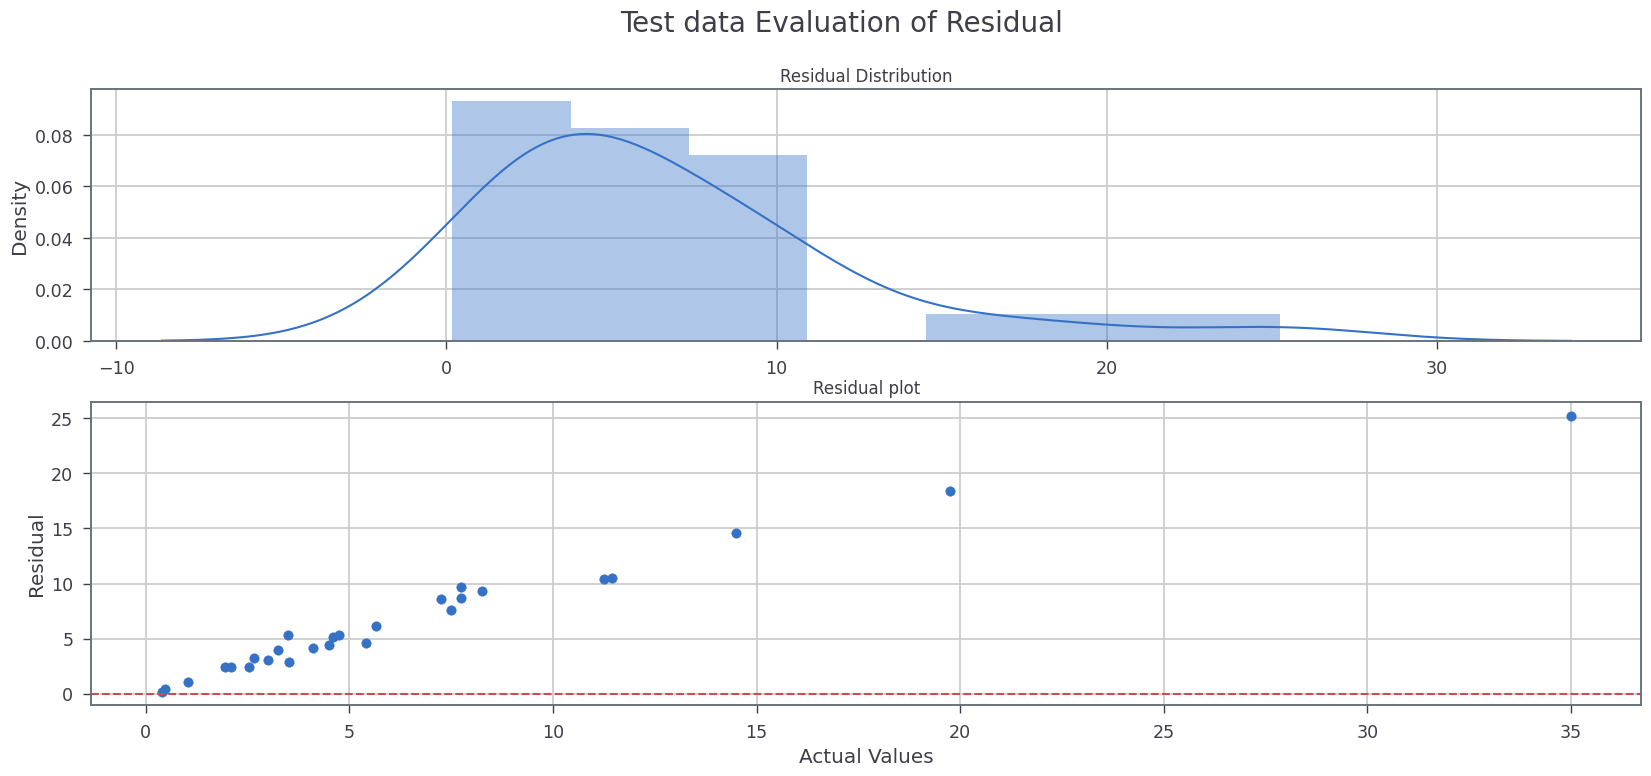

In [73]:
showResult(X_test_pred,y_test,'Test data')

In [92]:
mean_absolute_error(y_train,X_train_pred),root_mean_squared_error(y_train,X_train_pred)

(0.5953880940202446, 1.0250530465951369)

In [93]:
mean_absolute_error(y_test,X_test_pred),root_mean_squared_error(y_test,X_test_pred)

(1.1791414373888014, 2.000740012737517)

### Training Data Metrics:
- **Mean Absolute Error (MAE):** 0.5954
- **Root Mean Squared Error (RMSE):** 1.0251
- **R-squared Score (R2):** 0.9556

### Test Data Metrics (Unseen Data):
- **Mean Absolute Error (MAE):** 1.1791
- **Root Mean Squared Error (RMSE):** 2.0007
- **R-squared Score (R2):** 0.9158

### Observations:
1. **MAE and RMSE:** The Mean Absolute Error and Root Mean Squared Error are higher in the test data compared to the training data. This indicates that the model performs better on the training data than on unseen test data, which suggests some degree of overfitting.
  
2. **R-squared Score:** The R-squared score is high for both training and test data, indicating that the model explains a significant proportion of the variance in the target variable. However, the R-squared score is slightly lower for the test data, again suggesting some overfitting but still good predictive capability.

### Conclusion:
- The model shows strong predictive capability, as evidenced by the high R-squared score for both training and test data.
- However, there is a noticeable drop in performance when applying the model to unseen test data, indicating some overfitting.
- Further optimization or regularization techniques may be necessary to improve the model's generalization performance on unseen data.


<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
# Oasis Infobyte Task 3

**EMAIL SPAM DETECTION WITH MACHINE LEARNING**

📊📝🧮


Laptop with Browser Icon
We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.



In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!.

</div>


In [188]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import balanced_accuracy_score,classification_report,confusion_matrix

In [94]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 25.4MB/s]


In [95]:
extractFiles('/content/sms-spam-collection-dataset.zip')

In [98]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
## DATA CLEANUP AND PREPROCESSING

</div>

In [101]:
df = df[['v1','v2']]

In [102]:
df.shape

(5572, 2)

In [103]:
df.sample(5)

,v1,v2
3922,ham,Okay lor... Will they still let us go a not ah...
1076,ham,Where can download clear movies. Dvd copies.
3720,ham,Blank is Blank. But wat is blank? Lol
2504,ham,"Hello, my boytoy! I made it home and my consta..."
564,ham,"Fuck babe ... I miss you already, you know ? C..."


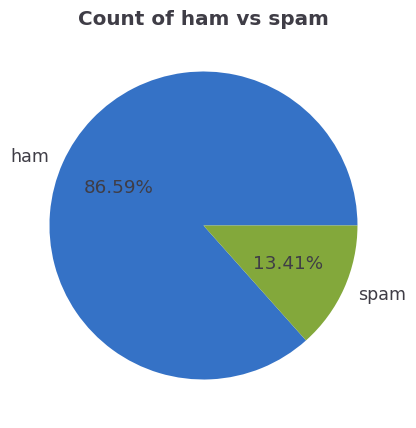

In [117]:
plt.figure(figsize=(20,5))
df['v1'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.title('Count of ham vs spam',fontweight='bold')
plt.ylabel(None)
plt.show()

In [122]:
# undersampling observations

spams = df[df['v1']=='spam']
hams = df[df['v1']=='ham'].sample(spams.shape[0])
df = pd.concat((hams,spams),axis=0).sample(frac = 1).reset_index(drop=True)
df['v1'] = df['v1'].map({'ham':0,'spam':1})

In [130]:
df.shape

(1494, 2)

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
## MODEL TRANING & TUNING

</div>

In [135]:
def preprocess(text):
  text = text.lower()
  pattern = r'[^\w\s]'
  text = re.sub(pattern, '', text)
  return text

In [164]:
X = df['v2']
y = df['v1']

In [165]:
X_train, X_other, y_train, y_other = train_test_split(X,y,test_size=0.3,random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size=0.3,random_state=101)

In [166]:
print(f'Training data : {X_train.shape}\nValidation data : {X_val.shape}\nTest data : {X_test.shape}')

Training data : (1045,)
Validation data : (314,)
Test data : (135,)


In [167]:
print(f'Training Target data : {y_train.shape}\nValidation Target data : {y_val.shape}\nTest Target data : {y_test.shape}')

Training Target data : (1045,)
Validation Target data : (314,)
Test Target data : (135,)


<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
### LOGISTIC REGRESSOR MODEL TRANING

</div>

In [205]:
pipe = Pipeline([
    ('CountVectorizer',CountVectorizer(stop_words='english',preprocessor=preprocess)),
    ('LogisticRegression',LogisticRegression())
])

In [206]:
pipe = pipe.fit(X_train,y_train)

In [207]:
X_train_pred = pipe.predict(X_train)

In [212]:
X_val_pred = pipe.predict(X_val)

In [210]:
def displayConf(y_val=None,X_val=None,title=None):
  plt.figure(figsize=(10,3))
  sns.heatmap(confusion_matrix(y_val,X_val),
              annot=True,
              fmt='d',
              cmap='Blues',
              xticklabels=['ham','spam'],
              yticklabels=['ham','spam'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Labels')
  plt.title(f'Confusion Matrix {title}')

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
#### LOGISTIC REGRESSOR MODEL EVALUATION

</div>

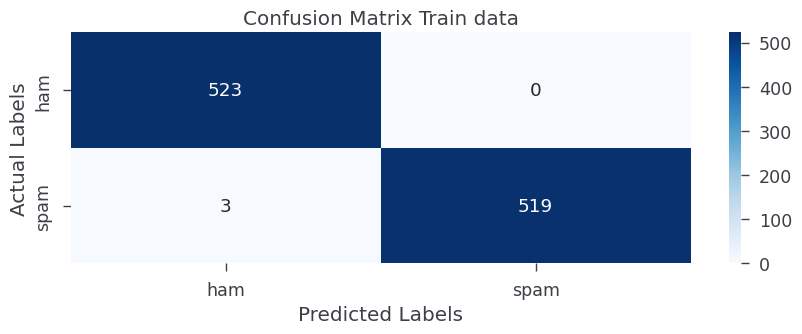

In [211]:
displayConf(y_train,X_train_pred,'Train data')

In [175]:
balanced_accuracy_score(y_train,X_train_pred)

0.9971264367816092

In [177]:
print(classification_report(y_train,X_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       523
           1       1.00      0.99      1.00       522

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



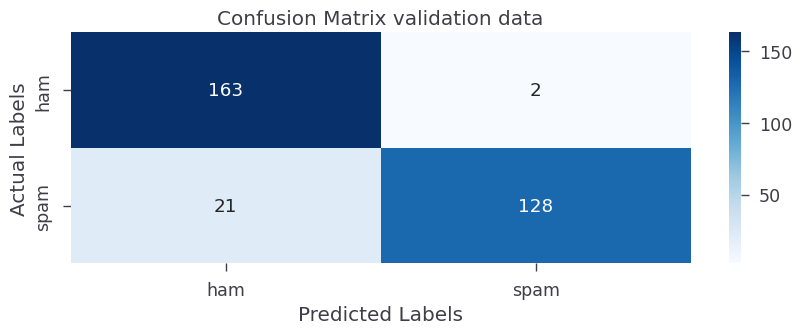

In [213]:
displayConf(y_val,X_val_pred,'validation data')

In [178]:
balanced_accuracy_score(y_val,X_val_pred)

0.9234695952816758

In [179]:
print(classification_report(y_val,X_val_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       165
           1       0.98      0.86      0.92       149

    accuracy                           0.93       314
   macro avg       0.94      0.92      0.93       314
weighted avg       0.93      0.93      0.93       314



In [180]:
X_test_pred = pipe.predict(X_test)

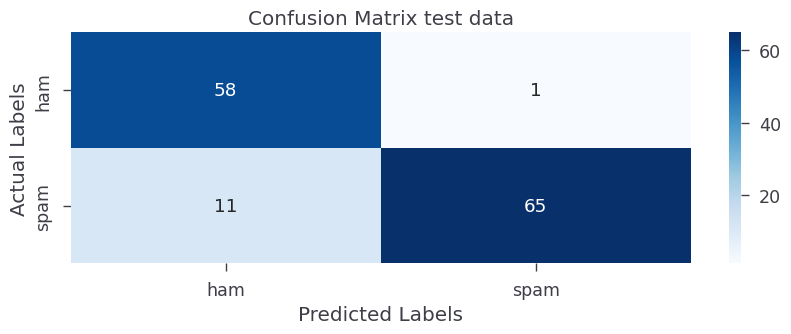

In [214]:
displayConf(y_test,X_test_pred,'test data')

In [181]:
balanced_accuracy_score(y_test,X_test_pred)

0.919157002676182

In [182]:
print(classification_report(y_test,X_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91        59
           1       0.98      0.86      0.92        76

    accuracy                           0.91       135
   macro avg       0.91      0.92      0.91       135
weighted avg       0.92      0.91      0.91       135



<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
#### MULTINOMIAL-NB MODEL TRANING

</div>

In [215]:
pipe = Pipeline([
    ('CountVectorizer',CountVectorizer(stop_words='english',preprocessor=preprocess)),
    ('MultinomialNB',MultinomialNB())
])

In [216]:
pipe = pipe.fit(X_train,y_train)

In [217]:
X_train_pred = pipe.predict(X_train)

In [218]:
X_val_pred = pipe.predict(X_val)

<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
#### MULTINOMIAL-NB MODEL EVALUATIONS

</div>

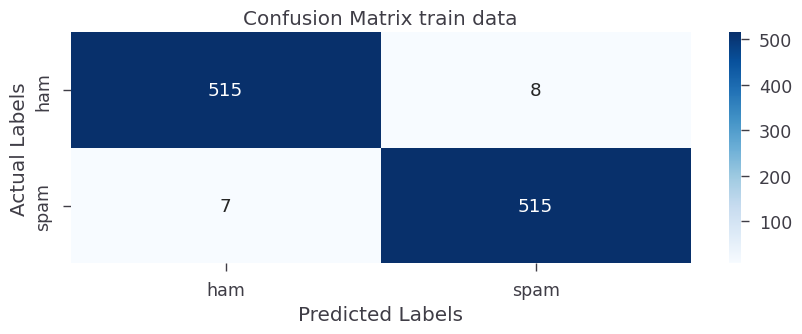

In [221]:
displayConf(y_train,X_train_pred,'train data')

In [223]:
balanced_accuracy_score(y_train,X_train_pred)

0.9856468356006828

In [195]:
print(classification_report(y_train,X_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       523
           1       0.98      0.99      0.99       522

    accuracy                           0.99      1045
   macro avg       0.99      0.99      0.99      1045
weighted avg       0.99      0.99      0.99      1045



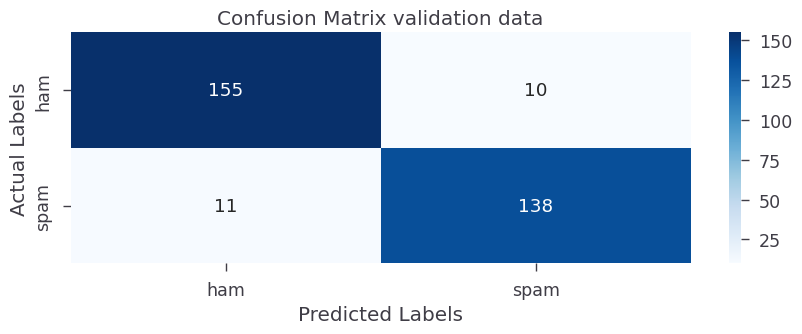

In [224]:
displayConf(y_val,X_val_pred,'validation data')

In [198]:
balanced_accuracy_score(y_val,X_val_pred)

0.9327842180191174

In [199]:
print(classification_report(y_val,X_val_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       165
           1       0.93      0.93      0.93       149

    accuracy                           0.93       314
   macro avg       0.93      0.93      0.93       314
weighted avg       0.93      0.93      0.93       314



In [227]:
X_test_pred = pipe.predict(X_test)

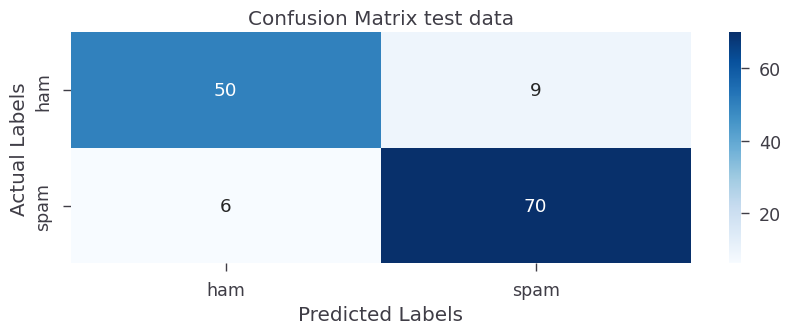

In [228]:
displayConf(y_test,X_test_pred,'test data')

In [229]:
print(classification_report(y_test,X_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        59
           1       0.89      0.92      0.90        76

    accuracy                           0.89       135
   macro avg       0.89      0.88      0.89       135
weighted avg       0.89      0.89      0.89       135



<div style="text-align: center; background-color: #f2f2f2; padding: 20px;">
    
## Observation: Performance of Logistic Regression vs. Multinomial Naive Bayes for Spam Classification

In our analysis of spam classification models, we compared the performance of Logistic Regression and Multinomial Naive Bayes classifiers. We found that the Logistic Regression model outperformed the Multinomial Naive Bayes model in terms of predicting spam emails.

### F1 Score Comparison

When evaluating the models' performance using the F1 score, which considers both precision and recall, we observed the following:

- **Logistic Regression Model (Spam Class - 1):** F1 Score = 0.92
- **Multinomial Naive Bayes Model (Spam Class - 1):** F1 Score = 0.90

### Conclusion

The Logistic Regression model demonstrated a higher F1 score for predicting spam emails compared to the Multinomial Naive Bayes model. This indicates that the Logistic Regression model is more effective at correctly identifying spam messages while minimizing false positives and false negatives.

</div>


